In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from statistics import mode 


fighter_details = pd.read_csv("raw_fighter_details.csv")
df = pd.read_csv("raw_total_fight_data.csv", sep=';')

In [4]:
df.head() 

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,...,0 of 0,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,...,1 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,...,0 of 0,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,...,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,...,2 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson


In [5]:
fighter_details.head() 

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   R_fighter        6012 non-null   object
 1   B_fighter        6012 non-null   object
 2   R_KD             6012 non-null   int64 
 3   B_KD             6012 non-null   int64 
 4   R_SIG_STR.       6012 non-null   object
 5   B_SIG_STR.       6012 non-null   object
 6   R_SIG_STR_pct    6012 non-null   object
 7   B_SIG_STR_pct    6012 non-null   object
 8   R_TOTAL_STR.     6012 non-null   object
 9   B_TOTAL_STR.     6012 non-null   object
 10  R_TD             6012 non-null   object
 11  B_TD             6012 non-null   object
 12  R_TD_pct         6012 non-null   object
 13  B_TD_pct         6012 non-null   object
 14  R_SUB_ATT        6012 non-null   int64 
 15  B_SUB_ATT        6012 non-null   int64 
 16  R_REV            6012 non-null   int64 
 17  B_REV            6012 non-null   

# EDA


# Split The Strike Attempts and Strikes Landed

In [7]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_REV', 'B_REV', 'R_CTRL', 'B_CTRL', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner'],
      dtype='object')

In [8]:
columns = ['R_SIG_STR.', 'B_SIG_STR.', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_HEAD', 'B_HEAD', 'R_BODY','B_BODY', 'R_LEG', 'B_LEG', 
        'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH','B_CLINCH', 'R_GROUND', 'B_GROUND']

In [9]:
attempt = '_att'
landed = '_landed'

for column in columns:
    df[column+attempt] = df[column].apply(lambda X: int(X.split('of')[1]))
    df[column+landed] = df[column].apply(lambda X: int(X.split('of')[0]))
    
df.drop(columns, axis=1, inplace=True)

In [10]:
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,B_DISTANCE_att,B_DISTANCE_landed,R_CLINCH_att,R_CLINCH_landed,B_CLINCH_att,B_CLINCH_landed,R_GROUND_att,R_GROUND_landed,B_GROUND_att,B_GROUND_landed
0,Adrian Yanez,Gustavo Lopez,2,0,39%,45%,---,0%,0,0,...,51,23,0,0,0,0,1,0,0,0
1,Trevin Giles,Roman Dolidze,0,0,47%,47%,50%,33%,1,2,...,59,28,5,4,6,3,10,8,2,1
2,Tai Tuivasa,Harry Hunsucker,1,0,77%,33%,---,---,0,0,...,6,2,0,0,0,0,8,5,0,0
3,Cheyanne Buys,Montserrat Conejo,0,0,47%,36%,---,80%,0,2,...,41,15,2,2,0,0,7,3,0,0
4,Marion Reneau,Macy Chiasson,0,0,47%,36%,50%,100%,0,0,...,119,36,9,5,15,13,0,0,4,2


# Weight Classes

In [11]:
def Division(X):
    for Division in weight_classes:
        if Division in X:
            return Division
    if X == 'Catch Weight Bout' or 'Catchweight Bout':
        return 'Catch Weight'
    else:
        return 'Open Weight'

In [12]:
weight_classes = ['Women\'s Strawweight', 'Women\'s Bantamweight', 
                  'Women\'s Featherweight', 'Women\'s Flyweight', 'Lightweight', 
                  'Welterweight', 'Middleweight','Light Heavyweight', 
                  'Heavyweight', 'Featherweight','Bantamweight', 'Flyweight', 'Open Weight']

df['weight_class'] = df['Fight_type'].apply(Division)

In [13]:
df['weight_class'].value_counts()

Lightweight              1091
Welterweight             1083
Middleweight              813
Heavyweight               585
Light Heavyweight         573
Featherweight             551
Bantamweight              475
Flyweight                 230
Women's Strawweight       192
Women's Bantamweight      151
Women's Flyweight         112
Open Weight                86
Catch Weight               54
Women's Featherweight      16
Name: weight_class, dtype: int64

# Number of Rounds

In [14]:
def get_rounds(X):
    if X == 'No Time Limit':
        return 1
    else:
        return len(X.split('(')[1].replace(')', '').split('-'))

df['no_of_rounds'] = df['Format'].apply(get_rounds)

# Replace the Winner's Name with Red or Blue

In [15]:
df['Winner'].isnull().sum()

110

In [16]:
df['Winner'].fillna('Draw', inplace=True) 

In [17]:
def get_renamed_winner(row):
    if row['R_fighter'] == row['Winner']:
        return 'Red'
    elif row['B_fighter'] == row['Winner']:
        return 'Blue'
    elif row['Winner'] == 'Draw':
        return 'Draw'

df['Winner'] = df[['R_fighter', 'B_fighter', 'Winner']].apply(get_renamed_winner, axis=1)

In [18]:
df['Winner'].value_counts()

Red     3979
Blue    1923
Draw     110
Name: Winner, dtype: int64

# Data of Fighter Details


# Converting Inches to Centimeters

In [19]:
def convert_to_cms(X):
    if X is np.NaN:
        return X
    elif len(X.split("'")) == 2:
        feet = float(X.split("'")[0])
        inches = int(X.split("'")[1].replace(' ', '').replace('"',''))
        return (feet * 30.48) + (inches * 2.54)
    else:
        return float(X.replace('"','')) * 2.54

In [20]:
fighter_details['Height'] = fighter_details['Height'].apply(convert_to_cms)
fighter_details['Reach'] = fighter_details['Reach'].apply(convert_to_cms)

In [21]:
fighter_details['Weight'] = fighter_details['Weight'].apply(lambda X: float(X.replace(' lbs.', '')) if X is not np.NaN else X)

In [22]:
fighter_details.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155.0,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,180.34,185.0,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,190.50,235.0,193.04,Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,180.34,155.0,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,167.64,145.0,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


# Merger Fighter Data with Match Data

In [23]:
new = df.merge(fighter_details, left_on='R_fighter', right_on='fighter_name', how='left')

In [24]:
new = new.drop('fighter_name', axis=1)

In [25]:
new.rename(columns={'Height':'R_Height',
                          'Weight':'R_Weight',
                          'Reach':'R_Reach',
                          'Stance':'R_Stance',
                          'DOB':'R_DOB'}, 
                 inplace=True)

In [26]:
new = new.merge(fighter_details, left_on='B_fighter', right_on='fighter_name', how='left')

In [27]:
new = new.drop('fighter_name', axis=1)

In [28]:
new.rename(columns={'Height':'B_Height',
                          'Weight':'B_Weight',
                          'Reach':'B_Reach',
                          'Stance':'B_Stance',
                          'DOB':'B_DOB'}, 
                 inplace=True)

In [29]:
new.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,B_Stance,B_DOB,SLpM_y,Str_Acc_y,SApM_y,Str_Def_y,TD_Avg_y,TD_Acc_y,TD_Def_y,Sub_Avg_y
0,Adrian Yanez,Gustavo Lopez,2,0,39%,45%,---,0%,0,0,...,Orthodox,"Jun 27, 1989",2.24,41%,4.65,51%,1.07,50%,27%,0.5
1,Trevin Giles,Roman Dolidze,0,0,47%,47%,50%,33%,1,2,...,Orthodox,"Jul 15, 1988",2.98,51%,1.75,61%,1.75,50%,33%,2.2
2,Tai Tuivasa,Harry Hunsucker,1,0,77%,33%,---,---,0,0,...,Orthodox,"Jan 03, 1989",4.33,51%,8.44,41%,0.00,0%,0%,0.0
3,Cheyanne Buys,Montserrat Conejo,0,0,47%,36%,---,80%,0,2,...,Southpaw,"Feb 03, 1993",1.00,36%,2.07,52%,4.00,80%,0%,2.0
4,Marion Reneau,Macy Chiasson,0,0,47%,36%,50%,100%,0,0,...,Orthodox,"Jul 27, 1991",4.16,49%,2.17,46%,0.98,21%,64%,0.5


# Obtain the Age

In [30]:
new['R_DOB'] = pd.to_datetime(new['R_DOB'])
new['B_DOB'] = pd.to_datetime(new['B_DOB'])
new['date'] = pd.to_datetime(new['date'])

In [31]:
new['R_year'] = new['R_DOB'].apply(lambda x: x.year)
new['B_year'] = new['B_DOB'].apply(lambda x: x.year)
new['date_year'] = new['date'].apply(lambda x: x.year)

In [32]:
def get_age(row):
    B_age = (row['date_year'] - row['B_year'])
    R_age = (row['date_year'] - row['R_year'])
    if np.isnan(B_age)!=True:
        B_age = B_age
    if np.isnan(R_age)!=True:
        R_age = R_age
    return pd.Series([B_age, R_age], index=['B_age', 'R_age'])

In [33]:
new[['B_age', 'R_age']]= new[['date_year', 'R_year', 'B_year']].apply(get_age, axis=1)

In [34]:
new.drop(['R_DOB', 'B_DOB','date_year','R_year','B_year'], axis=1, inplace=True)

# Fighter Country

In [35]:
new['country'] = new['location'].apply(lambda x : x.split(',')[-1])

# EDA & Visualization

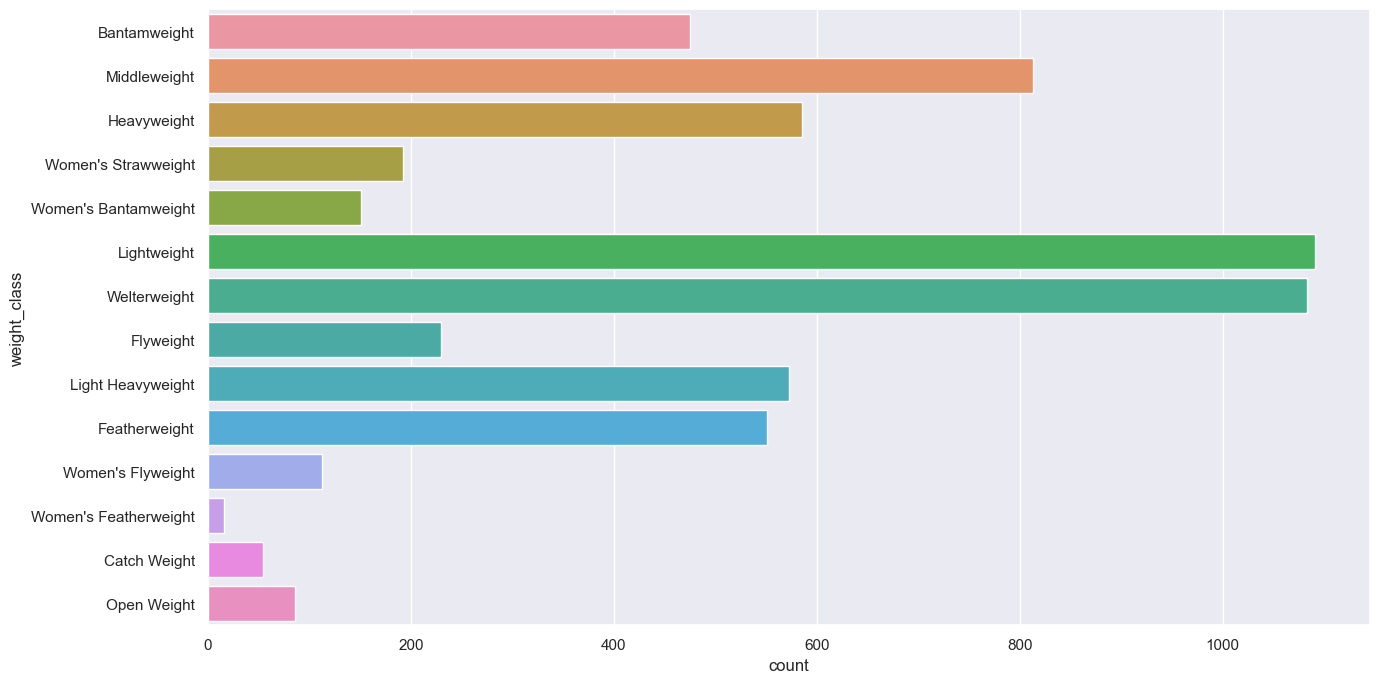

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(y=new['weight_class'])

sns.set()
sns.set(style="dark")
plt.show()

In [49]:
new['date_year'] = new['date'].apply(lambda x: x.year)

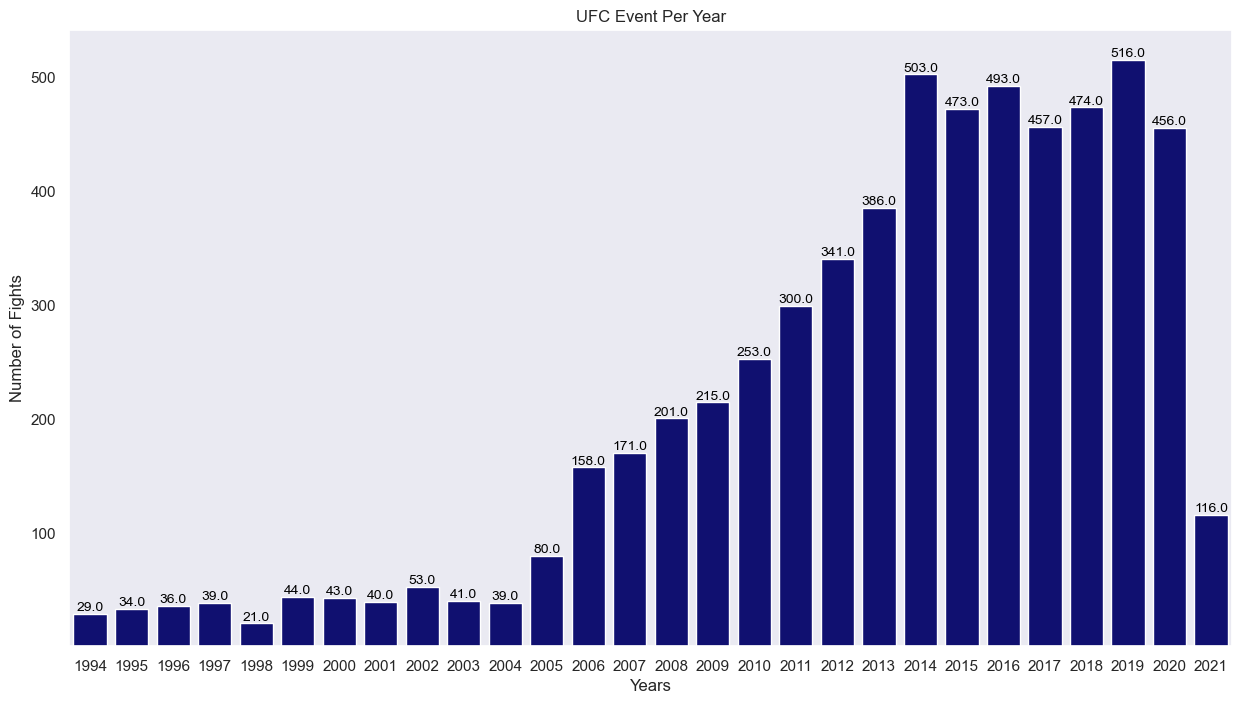

In [50]:
values = new['date_year'].sort_values(ascending=False).value_counts().sort_index()
labels = values.index

clrs = ['navy']

plt.figure(figsize=(15,8))
bar = sns.barplot(x=labels, y=values, palette=clrs)


ax = plt.gca()
y_max = values.max() 
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
        fontsize=10, color='black', ha='center', va='bottom')
    
plt.xlabel('Years')
plt.ylabel('Number of Fights')
plt.title('UFC Event Per Year')
plt.show()

In [51]:
women = new.weight_class.str.contains('Women')

In [52]:
women1 = len(new[women])
men = (len(new['weight_class'])) - len(new[women])

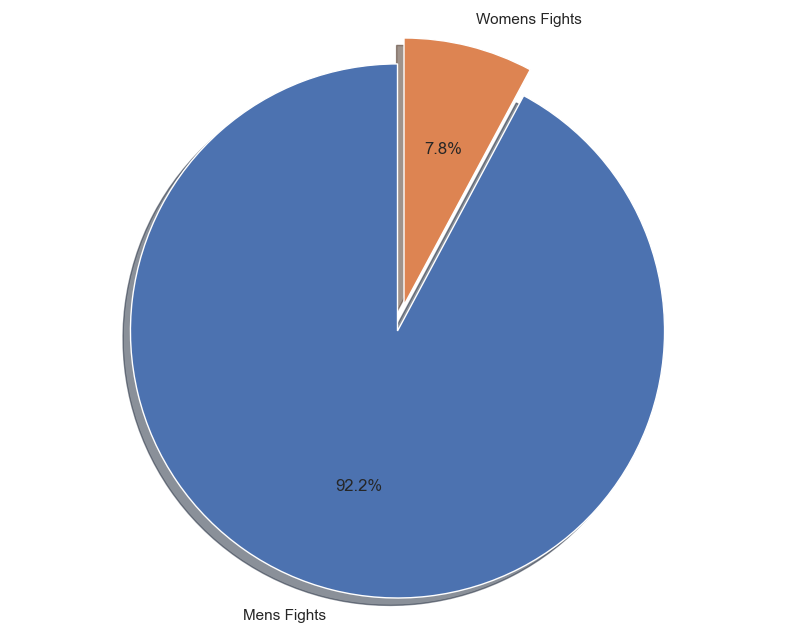

In [53]:
labels = 'Mens Fights', 'Womens Fights'
sizes = [men,women1]
explode = (0, 0.1,)  

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax1.axis('equal') 

plt.show()

# The win distribution between red and blue corners

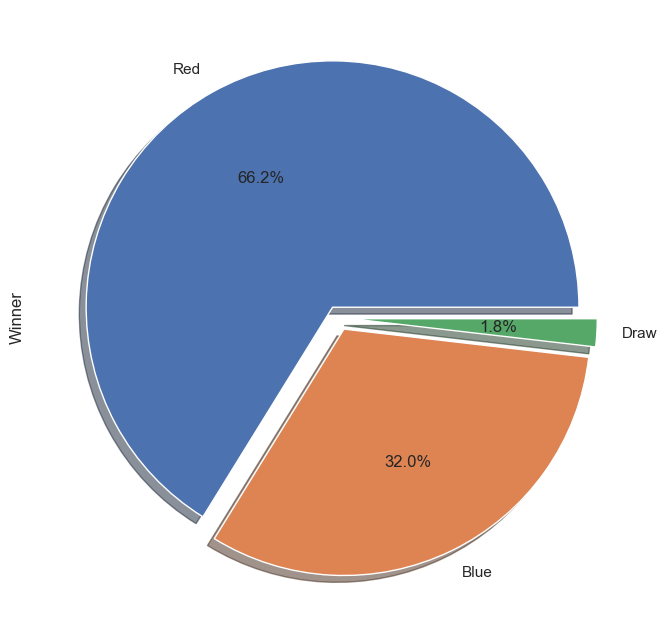

In [54]:
plt.figure(figsize=(15,8))
new['Winner'].value_counts()[:10].plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True)
plt.show()

# The figher in the Red corner wins a majority of the time

## How does `Age` impact the outcome of a fight?

In [42]:
new['R_age'] = new['R_age'].fillna(new['R_age'].median())

In [43]:
new['B_age'] = new['B_age'].fillna(new['B_age'].median())

/var/folders/s4/hm1fhwcn6_j3p3p9dbbynysh0000gn/T/ipykernel_79857/2051295877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new['R_age'], ax=ax[0])
/var/folders/s4/hm1fhwcn6_j3p3p9dbbynysh0000gn/T/ipykernel_79857/2051295877.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist = sns.distplot(new['B_ag

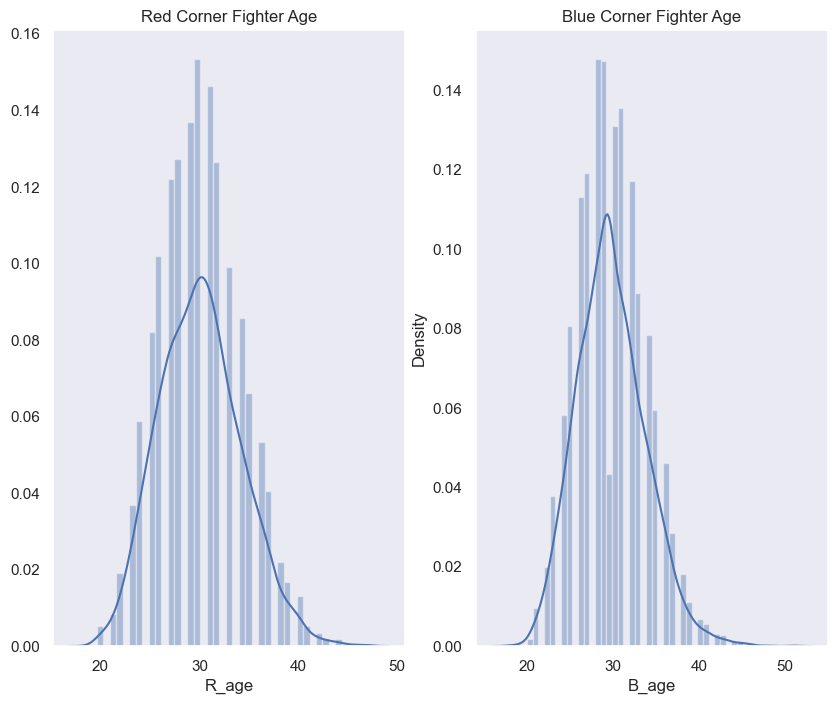

In [56]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(new['R_age'], ax=ax[0])

ax[0].set_title('Red Corner Fighter Age')
ax[0].set_ylabel('')
hist = sns.distplot(new['B_age'],ax=ax[1])


ax[1].set_title('Blue Corner Fighter Age')
plt.show()

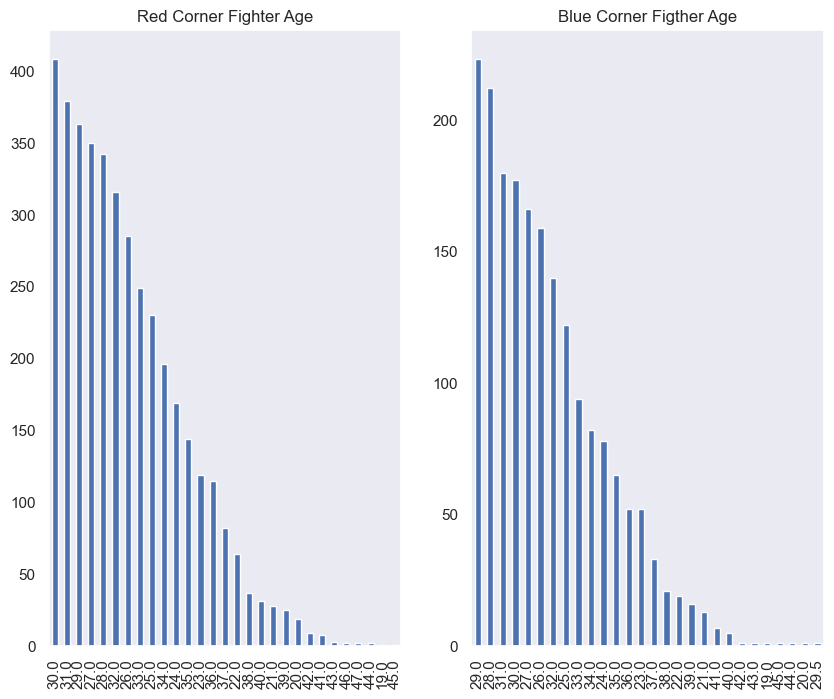

In [57]:
f,ax=plt.subplots(1,2,figsize=(10,8))
new[new['Winner']=='Red']['R_age'].value_counts().plot.bar(ax=ax[0])

ax[0].set_title('Red Corner Fighter Age')
ax[0].set_ylabel('')
bar = new[new['Winner']=='Blue']['B_age'].value_counts().plot.bar(ax=ax[1])

ax[1].set_title('Blue Corner Figther Age')
plt.show()

## What did each Fighter win by?

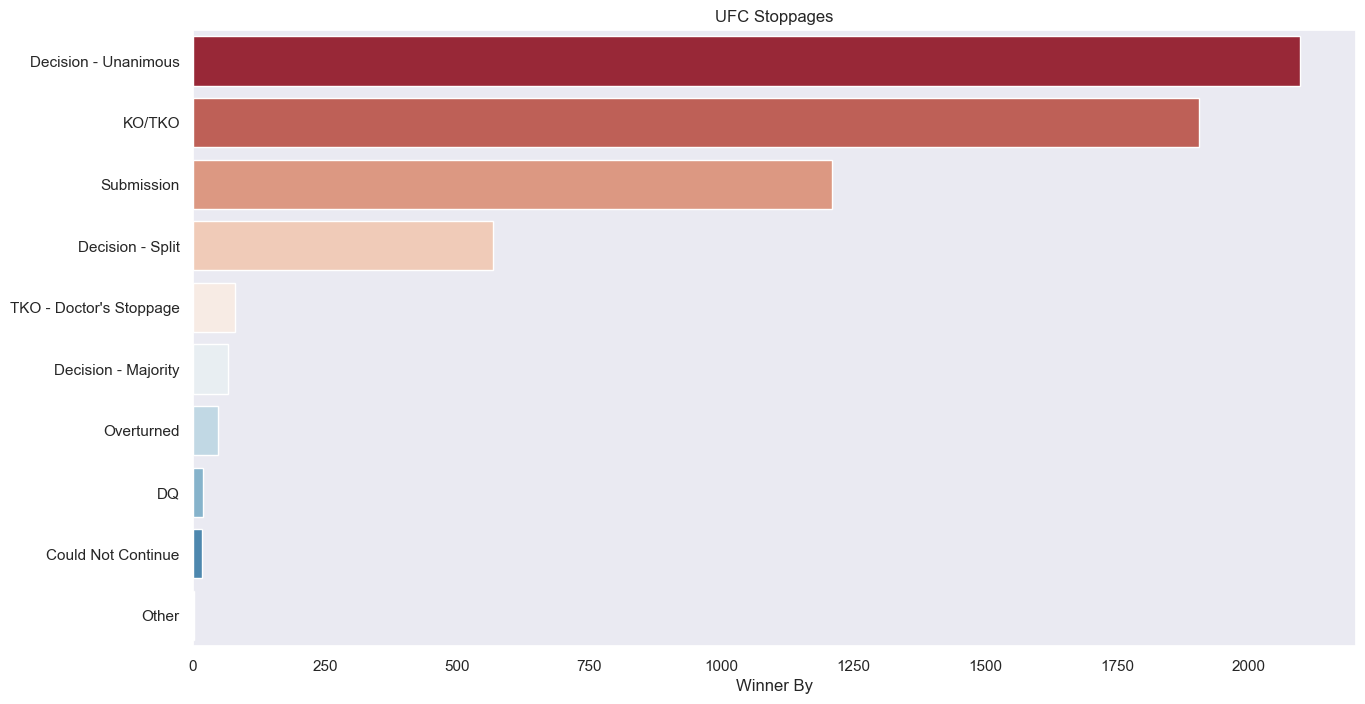

In [59]:
values = new['win_by'].value_counts()
labels = values.index

plt.figure(figsize=(15,8))

sns.barplot(x=values,y=labels, palette='RdBu')

plt.xlabel('Winner By')
plt.title('UFC Stoppages')
plt.show()

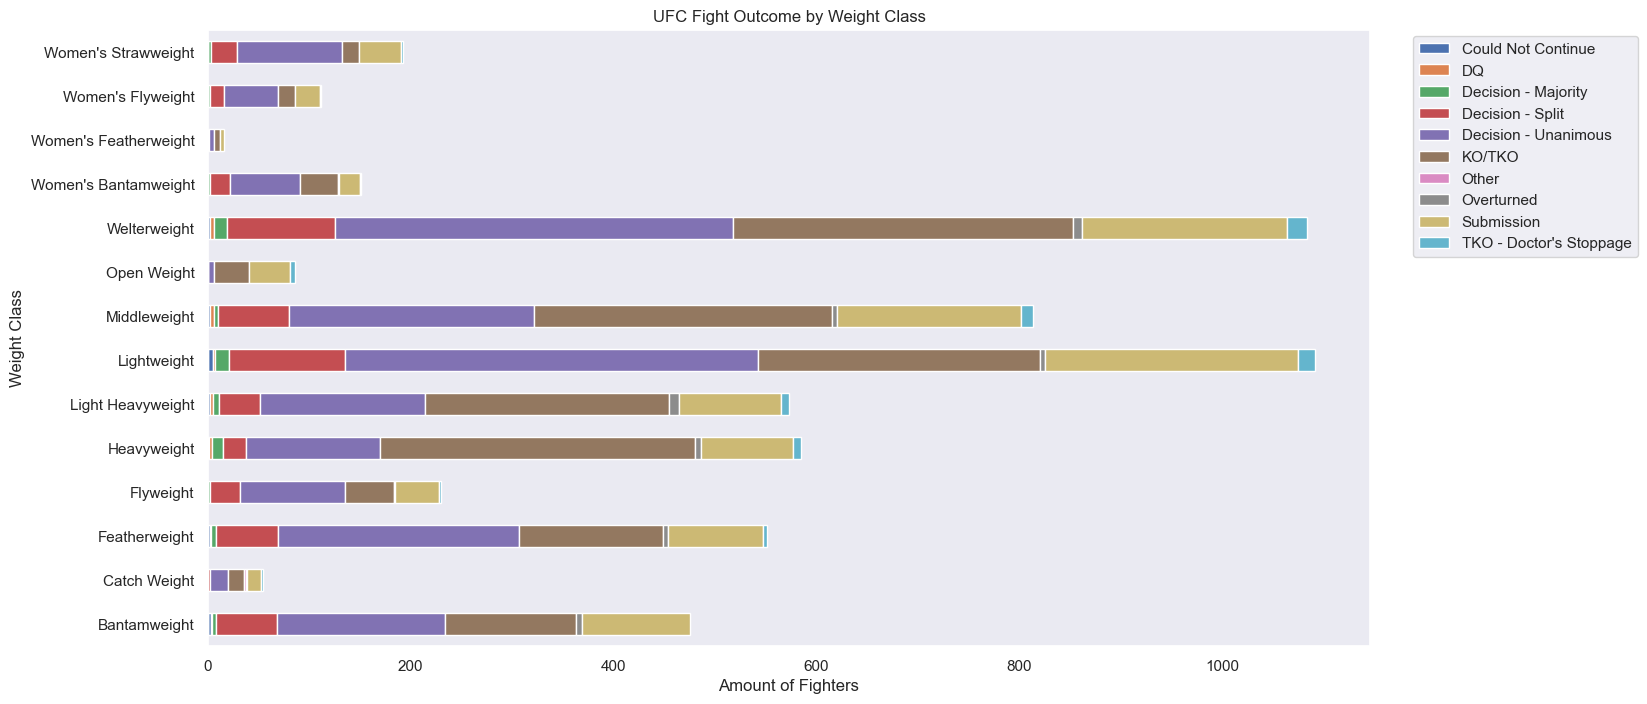

In [60]:
bar = new.groupby(['weight_class', 'win_by']).size().reset_index().pivot(columns='win_by', index='weight_class', values=0)
bar.plot(kind='barh', stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.23, 0.99), loc=1, borderaxespad=0.)
plt.title('UFC Fight Outcome by Weight Class')
plt.xlabel('Amount of Fighters')
plt.ylabel('Weight Class')
plt.show()

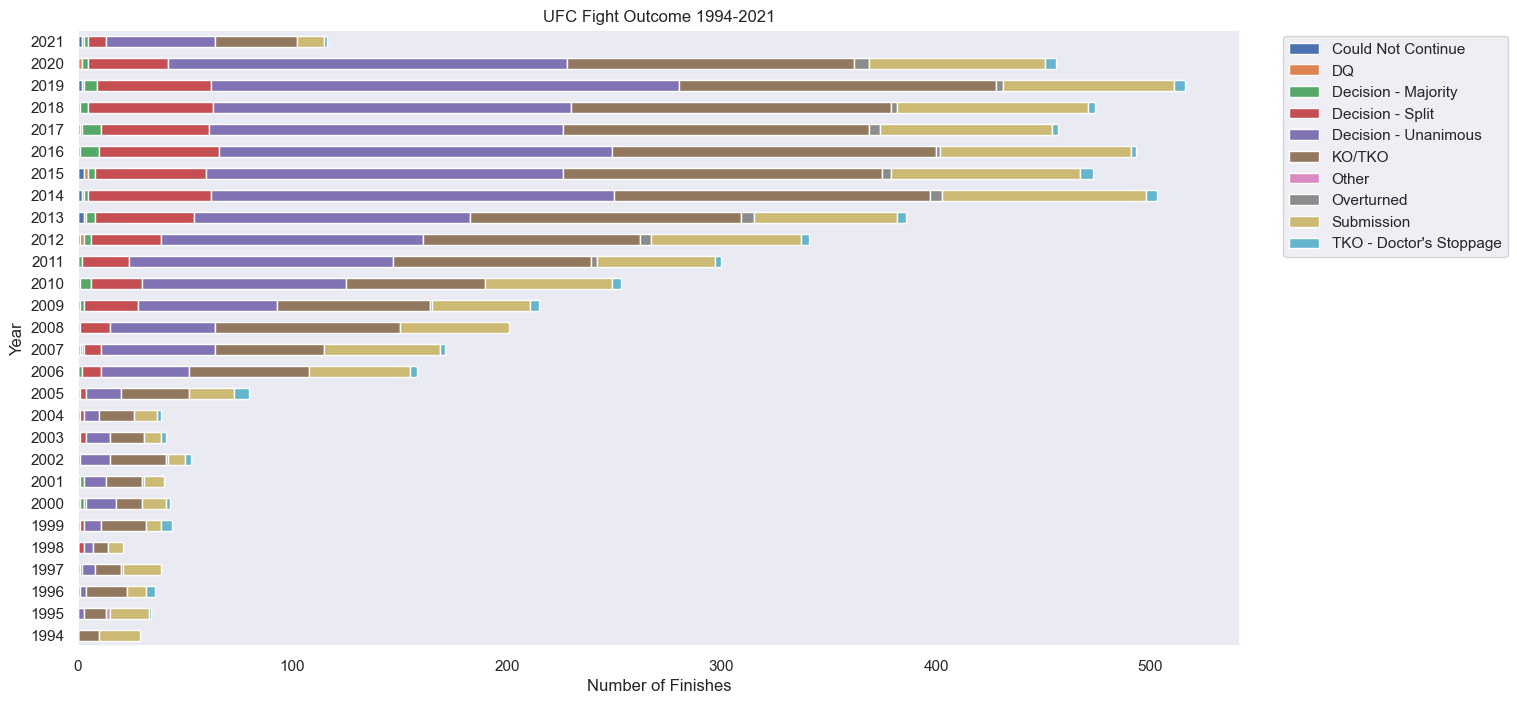

In [61]:
bar = new.groupby(['date_year', 'win_by']).size().reset_index().pivot(columns='win_by', index='date_year', values=0)
bar.plot(kind='barh', stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.23, 0.99), loc=1, borderaxespad=0.)
plt.title('UFC Fight Outcome 1994-2021')
plt.xlabel('Number of Finishes')
plt.ylabel('Year')
plt.show()

In [65]:
strike_attempt = pd.concat([new['R_TOTAL_STR._att'], new['B_TOTAL_STR._att']], ignore_index=True)
strike_landed = pd.concat([new['R_TOTAL_STR._landed'], new['B_TOTAL_STR._landed']], ignore_index=True)

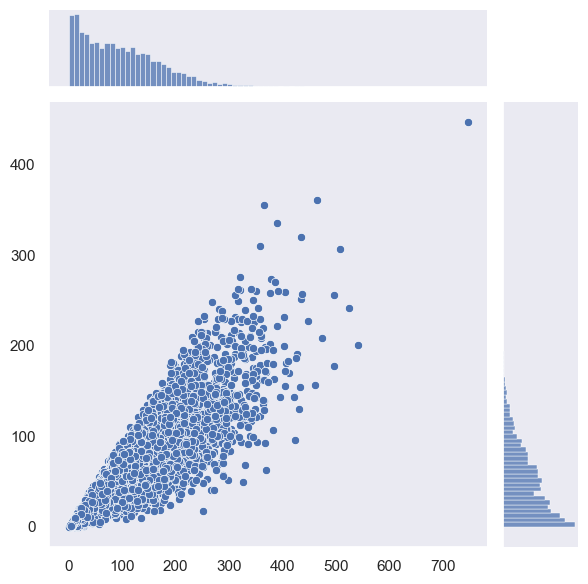

In [66]:
sns.jointplot(x=strike_attempt , y=strike_landed)
plt.show()

In [67]:
r_landed = new['R_TOTAL_STR._landed']
r_index = r_landed.index

In [68]:
b_landed = new['B_TOTAL_STR._landed']
b_index = b_landed.index

In [69]:
new['Winner'].head(9)

0     Red
1     Red
2     Red
3    Blue
4    Blue
5    Blue
6    Blue
7     Red
8     Red
Name: Winner, dtype: object

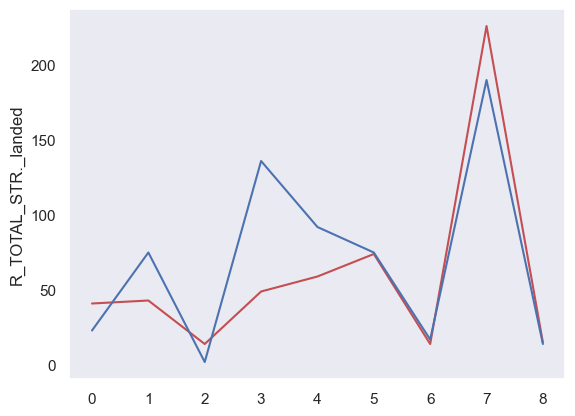

In [78]:
sns.lineplot(x=r_index[0:9], y=r_landed[0:9], color='r')
sns.lineplot(x=b_index[0:9], y=b_landed[0:9])
plt.show()

In [80]:
fighter = pd.concat([new['R_fighter'], new['B_fighter']], ignore_index=True)

# UFC Prediction

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")

# Deal with Null Values

In [82]:
df = new.copy()

In [83]:
df.isnull().sum()

R_fighter        0
B_fighter        0
R_KD             0
B_KD             0
R_SIG_STR_pct    0
                ..
Sub_Avg_y        0
B_age            0
R_age            0
country          0
date_year        0
Length: 89, dtype: int64

In [84]:
df = df.fillna(df.mean())

In [85]:
from statistics import mode 
df['B_Stance'] = df['B_Stance'].fillna(df['B_Stance'].mode()[0])
df['R_Stance'] = df['R_Stance'].fillna(df['R_Stance'].mode()[0])

# Encoding Data

In [86]:
enc = LabelEncoder()

In [87]:
data_enc1 = df['weight_class']
data_enc1 = enc.fit_transform(data_enc1)

data_enc2 = df['R_Stance']
data_enc2 = enc.fit_transform(data_enc2)

data_enc3 = df['B_Stance']
data_enc3= enc.fit_transform(data_enc3)

In [88]:
data_enc1 = pd.DataFrame(data_enc1, columns=['weight_class'])
data_enc2 = pd.DataFrame(data_enc2, columns=['R_Stance'])
data_enc3 = pd.DataFrame(data_enc3, columns=['B_Stance'])

In [89]:
df[['weight_class']] = data_enc1[['weight_class']]
df[['R_Stance']] = data_enc2[['R_Stance']]
df[['B_Stance']] = data_enc3[['B_Stance']]

In [90]:
df = pd.concat([df,pd.get_dummies(df['win_by'], prefix='win_by')],axis=1)
df.drop(['win_by'],axis=1, inplace=True)

In [91]:
df['Winner_num'] = df.Winner.map({'Red':0,'Blue':1,'Draw':2})

In [92]:
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,win_by_DQ,win_by_Decision - Majority,win_by_Decision - Split,win_by_Decision - Unanimous,win_by_KO/TKO,win_by_Other,win_by_Overturned,win_by_Submission,win_by_TKO - Doctor's Stoppage,Winner_num
0,Adrian Yanez,Gustavo Lopez,2,0,39%,45%,---,0%,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Trevin Giles,Roman Dolidze,0,0,47%,47%,50%,33%,1,2,...,0,0,0,1,0,0,0,0,0,0
2,Tai Tuivasa,Harry Hunsucker,1,0,77%,33%,---,---,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Cheyanne Buys,Montserrat Conejo,0,0,47%,36%,---,80%,0,2,...,0,0,0,1,0,0,0,0,0,1
4,Marion Reneau,Macy Chiasson,0,0,47%,36%,50%,100%,0,0,...,0,0,0,1,0,0,0,0,0,1


In [93]:
encode = df[['R_fighter','B_fighter','weight_class']].apply(enc.fit_transform)
encode.head()

,R_fighter,B_fighter,weight_class
0,11,691,0
1,1422,1616,7
2,1360,700,4
3,236,1380,13
4,947,1196,10


In [94]:
df[['R_fighter','B_fighter','weight_class']] = encode[['R_fighter','B_fighter','weight_class']] 

In [95]:
df = df.dropna()
sum(df.isnull().sum())

0

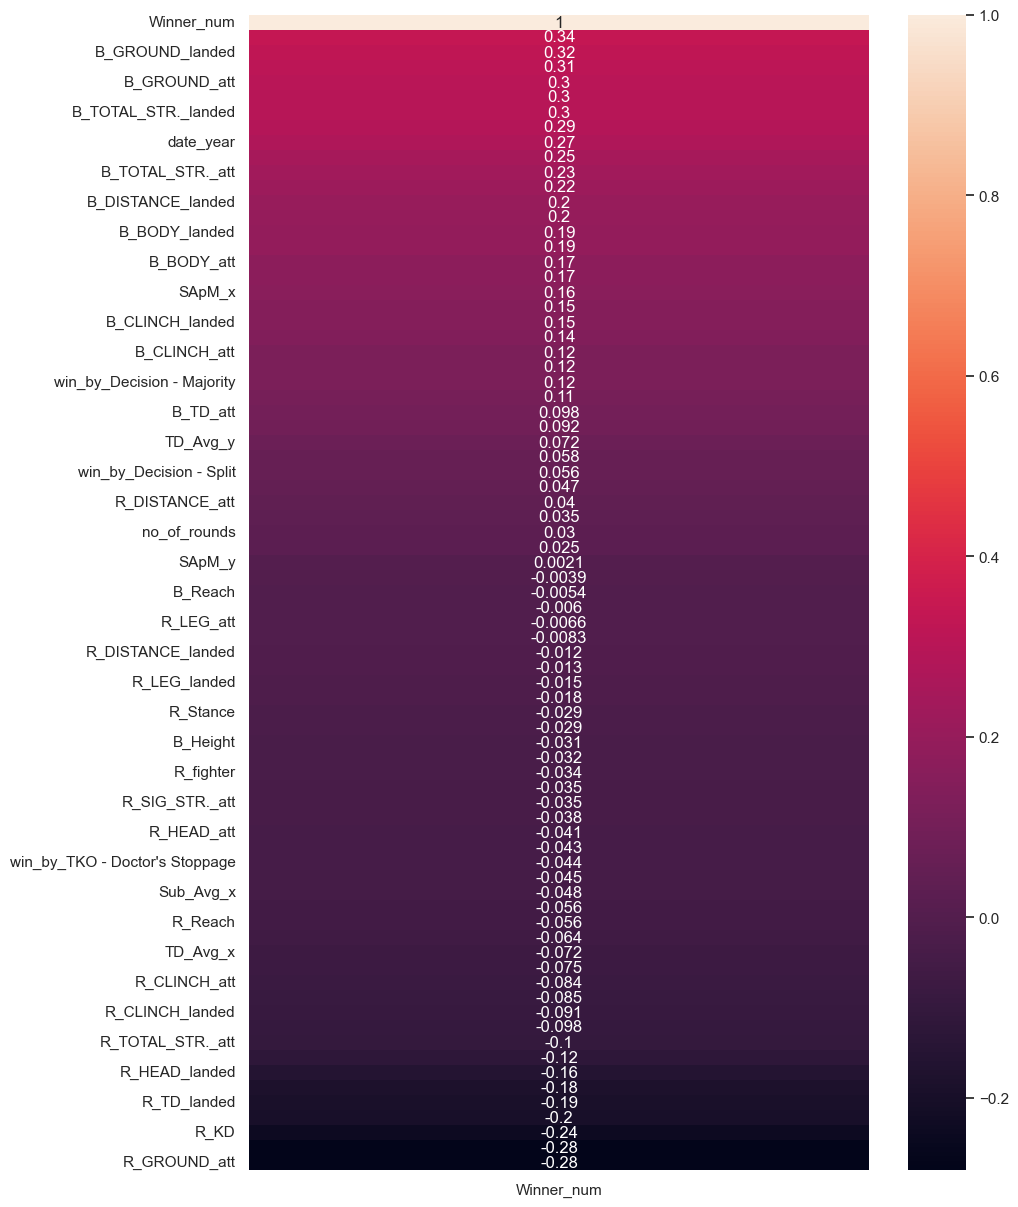

In [96]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr()[['Winner_num']].sort_values(by='Winner_num', ascending=False),annot=True)
plt.show()

# Normalize data with Standard Scaler

In [97]:
numerical = df.drop(['R_fighter','B_fighter','weight_class','no_of_rounds','Winner_num'], axis=1)

In [98]:
std = StandardScaler()
df_num = numerical.select_dtypes(include=[np.float, np.int])

In [99]:
numerical[list(df_num.columns)] = std.fit_transform(numerical[list(df_num.columns)])

In [100]:
df_fix = numerical.join(df[['R_fighter','B_fighter','weight_class','no_of_rounds','Winner_num']])

In [101]:
df_fix.head()

,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,...,win_by_KO/TKO,win_by_Other,win_by_Overturned,win_by_Submission,win_by_TKO - Doctor's Stoppage,R_fighter,B_fighter,weight_class,no_of_rounds,Winner_num
0,3.337115,-0.394707,39%,45%,---,0%,-0.520841,-0.434605,-0.326555,-0.326904,...,1,0,0,0,0,11,691,0,3,0
1,-0.478189,-0.394707,47%,47%,50%,33%,0.560627,2.087409,-0.326555,2.080589,...,0,0,0,0,0,1422,1616,7,3,0
2,1.429463,-0.394707,77%,33%,---,---,-0.520841,-0.434605,-0.326555,-0.326904,...,1,0,0,0,0,1360,700,4,3,0
3,-0.478189,-0.394707,47%,36%,---,80%,-0.520841,2.087409,6.765936,2.080589,...,0,0,0,0,0,236,1380,13,3,1
4,-0.478189,-0.394707,47%,36%,50%,100%,-0.520841,-0.434605,-0.326555,2.080589,...,0,0,0,0,0,947,1196,10,3,1


In [ ]:
ufc_data =pd.read_csv('data.csv')
ufc_data['B_current_lose_streak'] = pd.to_numeric(ufc_data['B_current_lose_streak'])
ufc_data['B_current_win_streak'] = pd.to_numeric(ufc_data['B_current_win_streak'])
ufc_data['B_draw'] = pd.to_numeric(ufc_data['B_draw'])
ufc_data['B_avg_BODY_att'] = pd.to_numeric(ufc_data['B_avg_BODY_att'])
ufc_data['B_avg_BODY_landed'] = pd.to_numeric(ufc_data['B_avg_BODY_landed'])
ufc_data['B_avg_CLINCH_att'] = pd.to_numeric(ufc_data['B_avg_CLINCH_att'])
ufc_data['B_avg_CLINCH_landed'] = pd.to_numeric(ufc_data['B_avg_CLINCH_landed'])
ufc_data['B_avg_DISTANCE_att'] = pd.to_numeric(ufc_data['B_avg_DISTANCE_att'])
ufc_data['B_avg_DISTANCE_landed'] = pd.to_numeric(ufc_data['B_avg_DISTANCE_landed'])
ufc_data['B_avg_DISTANCE_att'] = pd.to_numeric(ufc_data['B_avg_DISTANCE_att'])
ufc_data['B_avg_GROUND_att'] = pd.to_numeric(ufc_data['B_avg_GROUND_att'])
ufc_data['B_avg_DISTANCE_att'] = pd.to_numeric(ufc_data['B_avg_DISTANCE_att'])
ufc_data['B_avg_GROUND_landed'] = pd.to_numeric(ufc_data['B_avg_GROUND_landed'])
ufc_data['B_avg_HEAD_att'] = pd.to_numeric(ufc_data['B_avg_HEAD_att'])
ufc_data['B_avg_HEAD_landed'] = pd.to_numeric(ufc_data['B_avg_HEAD_landed'])
ufc_data['B_avg_KD'] = pd.to_numeric(ufc_data['B_avg_KD'])
ufc_data['B_avg_LEG_att'] = pd.to_numeric(ufc_data['B_avg_LEG_att'])
ufc_data['B_avg_LEG_landed'] = pd.to_numeric(ufc_data['B_avg_LEG_landed'])
ufc_data['B_avg_REV'] = pd.to_numeric(ufc_data['B_avg_REV'])
ufc_data['B_avg_SIG_STR_att'] = pd.to_numeric(ufc_data['B_avg_SIG_STR_att'])
ufc_data['B_avg_SIG_STR_landed'] = pd.to_numeric(ufc_data['B_avg_SIG_STR_landed'])
ufc_data['B_avg_SIG_STR_pct'] = pd.to_numeric(ufc_data['B_avg_SIG_STR_pct'])
ufc_data['B_Height_cms'] = pd.to_numeric(ufc_data['B_Height_cms'])
ufc_data['B_age'] = pd.to_numeric(ufc_data['B_age'])
ufc_data['B_total_time_fought(seconds)'] = pd.to_numeric(ufc_data['B_total_time_fought(seconds)'])
ufc_data['R_current_lose_streak'] = pd.to_numeric(ufc_data['R_current_lose_streak'])
ufc_data['R_current_win_streak'] = pd.to_numeric(ufc_data['R_current_win_streak'])
ufc_data['R_draw'] = pd.to_numeric(ufc_data['R_draw'])
ufc_data['R_avg_BODY_att'] = pd.to_numeric(ufc_data['R_avg_BODY_att'])
ufc_data['R_avg_BODY_landed'] = pd.to_numeric(ufc_data['R_avg_BODY_landed'])
ufc_data['R_avg_CLINCH_att'] = pd.to_numeric(ufc_data['R_avg_CLINCH_att'])
ufc_data['R_avg_CLINCH_landed'] = pd.to_numeric(ufc_data['R_avg_CLINCH_landed'])
ufc_data['R_avg_DISTANCE_att'] = pd.to_numeric(ufc_data['R_avg_DISTANCE_att'])
ufc_data['R_avg_DISTANCE_landed'] = pd.to_numeric(ufc_data['R_avg_DISTANCE_landed'])
ufc_data['R_avg_DISTANCE_att'] = pd.to_numeric(ufc_data['R_avg_DISTANCE_att'])
ufc_data['R_avg_GROUND_att'] = pd.to_numeric(ufc_data['R_avg_GROUND_att'])
ufc_data['R_avg_DISTANCE_att'] = pd.to_numeric(ufc_data['R_avg_DISTANCE_att'])
ufc_data['R_avg_GROUND_landed'] = pd.to_numeric(ufc_data['R_avg_GROUND_landed'])
ufc_data['R_avg_HEAD_att'] = pd.to_numeric(ufc_data['R_avg_HEAD_att'])
ufc_data['R_avg_HEAD_landed'] = pd.to_numeric(ufc_data['R_avg_HEAD_landed'])
ufc_data['R_avg_KD'] = pd.to_numeric(ufc_data['R_avg_KD'])
ufc_data['R_avg_LEG_att'] = pd.to_numeric(ufc_data['R_avg_LEG_att'])
ufc_data['R_avg_LEG_landed'] = pd.to_numeric(ufc_data['R_avg_LEG_landed'])
ufc_data['R_avg_REV'] = pd.to_numeric(ufc_data['R_avg_REV'])
ufc_data['R_avg_SIG_STR_att'] = pd.to_numeric(ufc_data['R_avg_SIG_STR_att'])
ufc_data['R_avg_SIG_STR_landed'] = pd.to_numeric(ufc_data['R_avg_SIG_STR_landed'])
ufc_data['R_Height_cms'] = pd.to_numeric(ufc_data['R_Height_cms'])
ufc_data['R_age'] = pd.to_numeric(ufc_data['R_age'])
ufc_data['R_total_time_fought(seconds)'] = pd.to_numeric(ufc_data['R_total_time_fought(seconds)'])
ufc_data['R_win_by_KO/TKO'] = pd.to_numeric(ufc_data['R_win_by_KO/TKO'])
ufc_data['R_win_by_Submission'] = pd.to_numeric(ufc_data['R_win_by_Submission'])
ufc_data.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

In [122]:
dw=pd.read_csv('preprocessed_data.csv')
dw_num = dw.select_dtypes(include=[np.float, np.int])
y = dw['Winner']
x = dw.drop(columns = 'Winner')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [123]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)


In [124]:
model.fit(X_train, y_train)


RandomForestClassifier(oob_score=True, random_state=43)

In [125]:
y_preds = model.predict(X_test)
accuracy_score(y_test, y_preds)

0.6700542005420054

In [126]:
model.feature_importances_

array([1.26269102e-03, 4.52745571e-03, 3.67319904e-03, 7.61211533e-03,
       8.03468040e-03, 6.44712976e-03, 6.77926242e-03, 5.76069500e-03,
       4.96222094e-03, 3.47159219e-03, 3.28554878e-03, 9.16214427e-03,
       1.17910548e-02, 6.11969690e-03, 7.33243460e-03, 7.27142964e-03,
       8.33982716e-03, 7.22350802e-03, 7.64778956e-03, 8.10919657e-03,
       6.48524131e-03, 5.93366786e-03, 5.92555496e-03, 8.89118991e-03,
       8.84751742e-03, 6.60805472e-03, 6.61888236e-03, 9.53704699e-03,
       7.14232312e-03, 7.12150900e-03, 6.83673349e-03, 6.85746386e-03,
       6.42815698e-03, 6.33934330e-03, 6.79845843e-03, 9.29633880e-03,
       9.09620407e-03, 7.00493693e-03, 7.11220546e-03, 6.64905248e-03,
       6.18126705e-03, 7.87026748e-03, 6.55680917e-03, 6.98024262e-03,
       6.73793094e-03, 8.02950942e-03, 7.12032663e-03, 6.94651513e-03,
       7.64323463e-03, 6.95337349e-03, 5.76110979e-03, 1.22263593e-03,
       2.74837466e-03, 1.71792234e-03, 2.81534982e-03, 3.74486445e-03,
      

In [127]:
scaler = StandardScaler()
dw[list(dw_num.columns)] = scaler.fit_transform(dw[list(dw_num.columns)])

In [128]:
y = dw['Winner']
X = dw.drop(columns = 'Winner')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [129]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.89%


In [130]:

logreg = LogisticRegression(solver='liblinear')


logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)

In [131]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[155, 329],
       [143, 849]])

Text(0.5, 427.9555555555555, 'Predicted label')

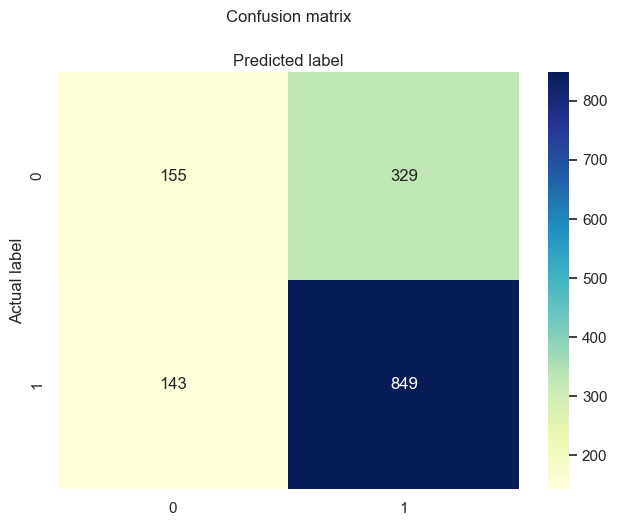

In [132]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [133]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6802168021680217
